In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
df = pd.read_csv('../../data/titanic-passengers-datavis.csv', sep=';')
df_back = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [90]:
print(df.shape)
df.columns


(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- We have 891 instance and 12 columns

In [91]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1. Preprocessing 

In [92]:
# PassengerId is an insignificant variable, drop it
del df['PassengerId']

# Check for null values 
df.isnull().sum()

# look for null values in form of nan or ?
# df.eq(np.nan).sum()
# df.eq('?').sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

- Cabin has too many nulls (687/891) -> drop the column
- Age has few ones 177/891 -> replace them by the mean

In [93]:
del df['Cabin']

df['Age'].fillna(df['Age'].mode(), inplace =True)

In [94]:
# change Survived to Yes:1, No:0
dic = {
    'Yes': 1,
    'No': 0,
}

df.Survived.replace(dic, inplace=True)
survived = df[df.Survived == 1]
not_survived = df[df.Survived == 0]

In [95]:
# change Sex to male:1, female:0
dic2 = {
    'male':1,
    'female': 0
}
df.Sex.replace(dic2, inplace=True)

In [96]:
# df['Cabin'].replace('?', np.nan, inplace=True)
# df['Survived'].unique()

df['Age'].value_counts()


24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
        ..
36.5     1
55.5     1
34.5     1
14.5     1
23.5     1
Name: Age, Length: 88, dtype: int64

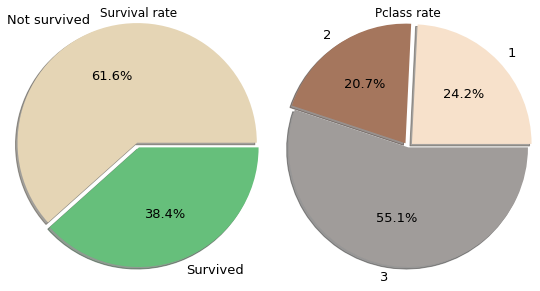

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

# (0,0)
axes[0].set_title('Survival rate')
axes[0].pie(df.groupby('Survived')['Survived'].count(), labels=['Not survived', 'Survived'],
            shadow = True, explode = (0.05, 0), radius = 1.2,
            colors= ['#e5d5b5','#66bf7b'], autopct='%1.1f%%', textprops={'fontsize':13})
              
# (0,1)
axes[1].set_title('Pclass rate')
axes[1].pie(df.groupby('Pclass')['Pclass'].count(), labels=['1', '2', '3'],
            shadow = True, explode = (0.05, 0.05, 0), radius = 1.2,
            colors= ['#f7e1cb','#a5765d','#a09c9a'],autopct='%1.1f%%', textprops={'fontsize':13})

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.6, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)

plt.tight_layout()                             # Avoid overlapping.
plt.show()

- Survival rate is very low
- Half the number of passengers are from class 3

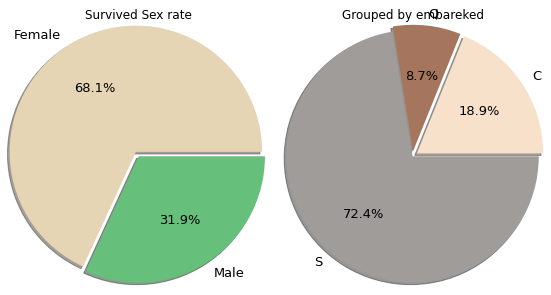

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

axes[0].set_title('Survived Sex rate')
axes[0].pie(survived.groupby('Sex')['Sex'].count(), labels=['Female', 'Male'],
            shadow = True, explode = (0.05, 0), radius = 1.2,
            colors=['#e5d5b5','#66bf7b'],autopct='%1.1f%%', textprops={'fontsize':13})

axes[1].set_title('Grouped by embareked')
axes[1].pie( df.groupby('Embarked')['Embarked'].count(),  labels=['C', 'Q', 'S'],
            shadow = True, explode = (0.05, 0.05, 0), radius = 1.2,
             colors=['#f7e1cb','#a5765d','#a09c9a'], autopct='%1.1f%%', textprops={'fontsize':13})

# set the spacing between subplots
plt.subplots_adjust(left=0.2,
                    bottom=0.6, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)

plt.tight_layout()                             # Avoid overlapping.
plt.show()

- From people who survived most of the are women  68% and a few are men 31%
- Most passengers embarked from Southampton post

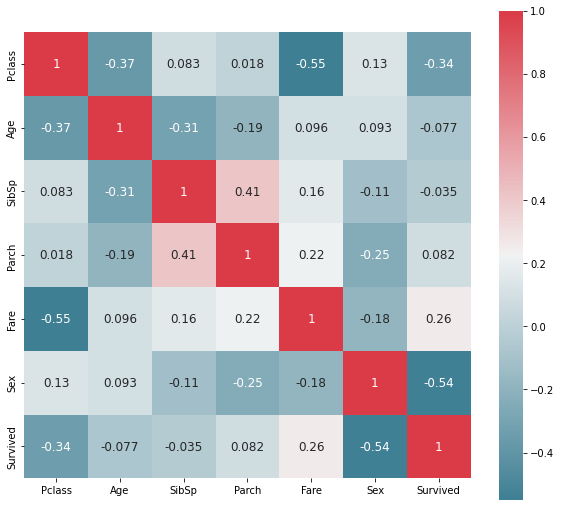

In [99]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 10 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Survived']
plot_correlation_map(df[columns])

- We can see that there's a quite good corelation between fare and Pclass (0.55) we can deduce that the heigher the fare the higher thae price that paid the passenger
- Also quite good corelation between Survived and Sex, and SibSp and Parch
- Besides that, there's a low corelation between all variables

In [100]:
# Get Title colmun

Title_Dictionary = {
                    "Capt":"Officer",
                    "Col": "Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":'Officer',
                    "Jonkheer":"Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess" : "Royalty",
                    "Dona":       'Royalty',
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }

# df['Title'] = 

In [101]:
df["Title"] = df["Name"].str.split(", ").str[1].str.split(".").str[0]
df["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

In [102]:
df.replace(Title_Dictionary, inplace= True)
df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [103]:
# we don't need Name column anymore
del df['Name']


In [104]:
df['FamilySize'] = df.Parch + df.SibSp


In [105]:
del df['SibSp']
del df['Parch']

In [106]:
df.FamilySize.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

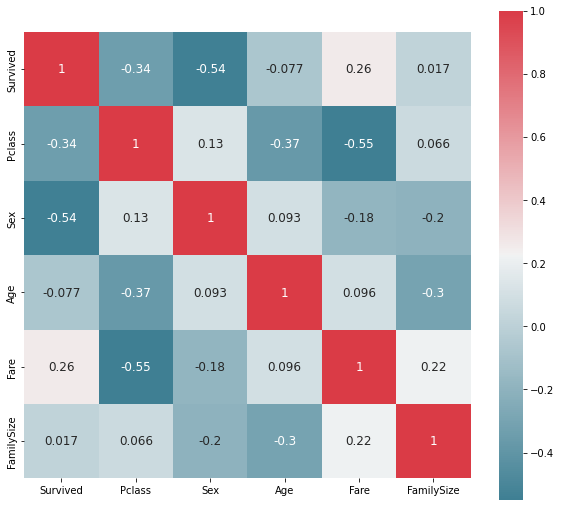

In [108]:
plot_correlation_map(df)